# Deteccion de Fraude Machine Learning

**Importamos los paquetes necesarios**

In [58]:
import os
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from scipy import stats

**Importamos los datos**

In [59]:
INPUT_ZIP = "../data/in/Fraud_Detction_Dataset.zip"  # Directorio del zip
OUTPUT_FOLDER = "../data/out/"  # Directorio de destino
TRAIN_FILENAME = "creditcard.csv"  # Nombre del fichero de entrenamiento

def fetch_data(input_path=INPUT_ZIP, output_dir=OUTPUT_FOLDER):
    
    # Comprobación de que el directorio de destino existe
    os.makedirs(output_dir, exist_ok=True)

    # Descomprime el archivo ZIP en caso de que no haya ningún csv en la carpeta
    if(len([file for file in os.listdir(output_dir) if file.endswith('.csv')]) == 0):
        with zipfile.ZipFile(input_path, 'r') as zip_ref:
            zip_ref.extractall(output_dir)


def load_data(directory=OUTPUT_FOLDER, filename=TRAIN_FILENAME):

    # Construir la ruta completa al archivo CSV
    file_path = os.path.join(directory, filename)

    # Verificar si el archivo existe
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"El archivo {filename} no se encuentra en el directorio {directory}")

    # Leer el archivo CSV en un DataFrame
    return pd.read_csv(file_path)

fetch_data()
df = load_data()
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [60]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [61]:
df.shape

(284807, 31)

In [62]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [64]:
df['Class'] = df['Class'].astype('object')

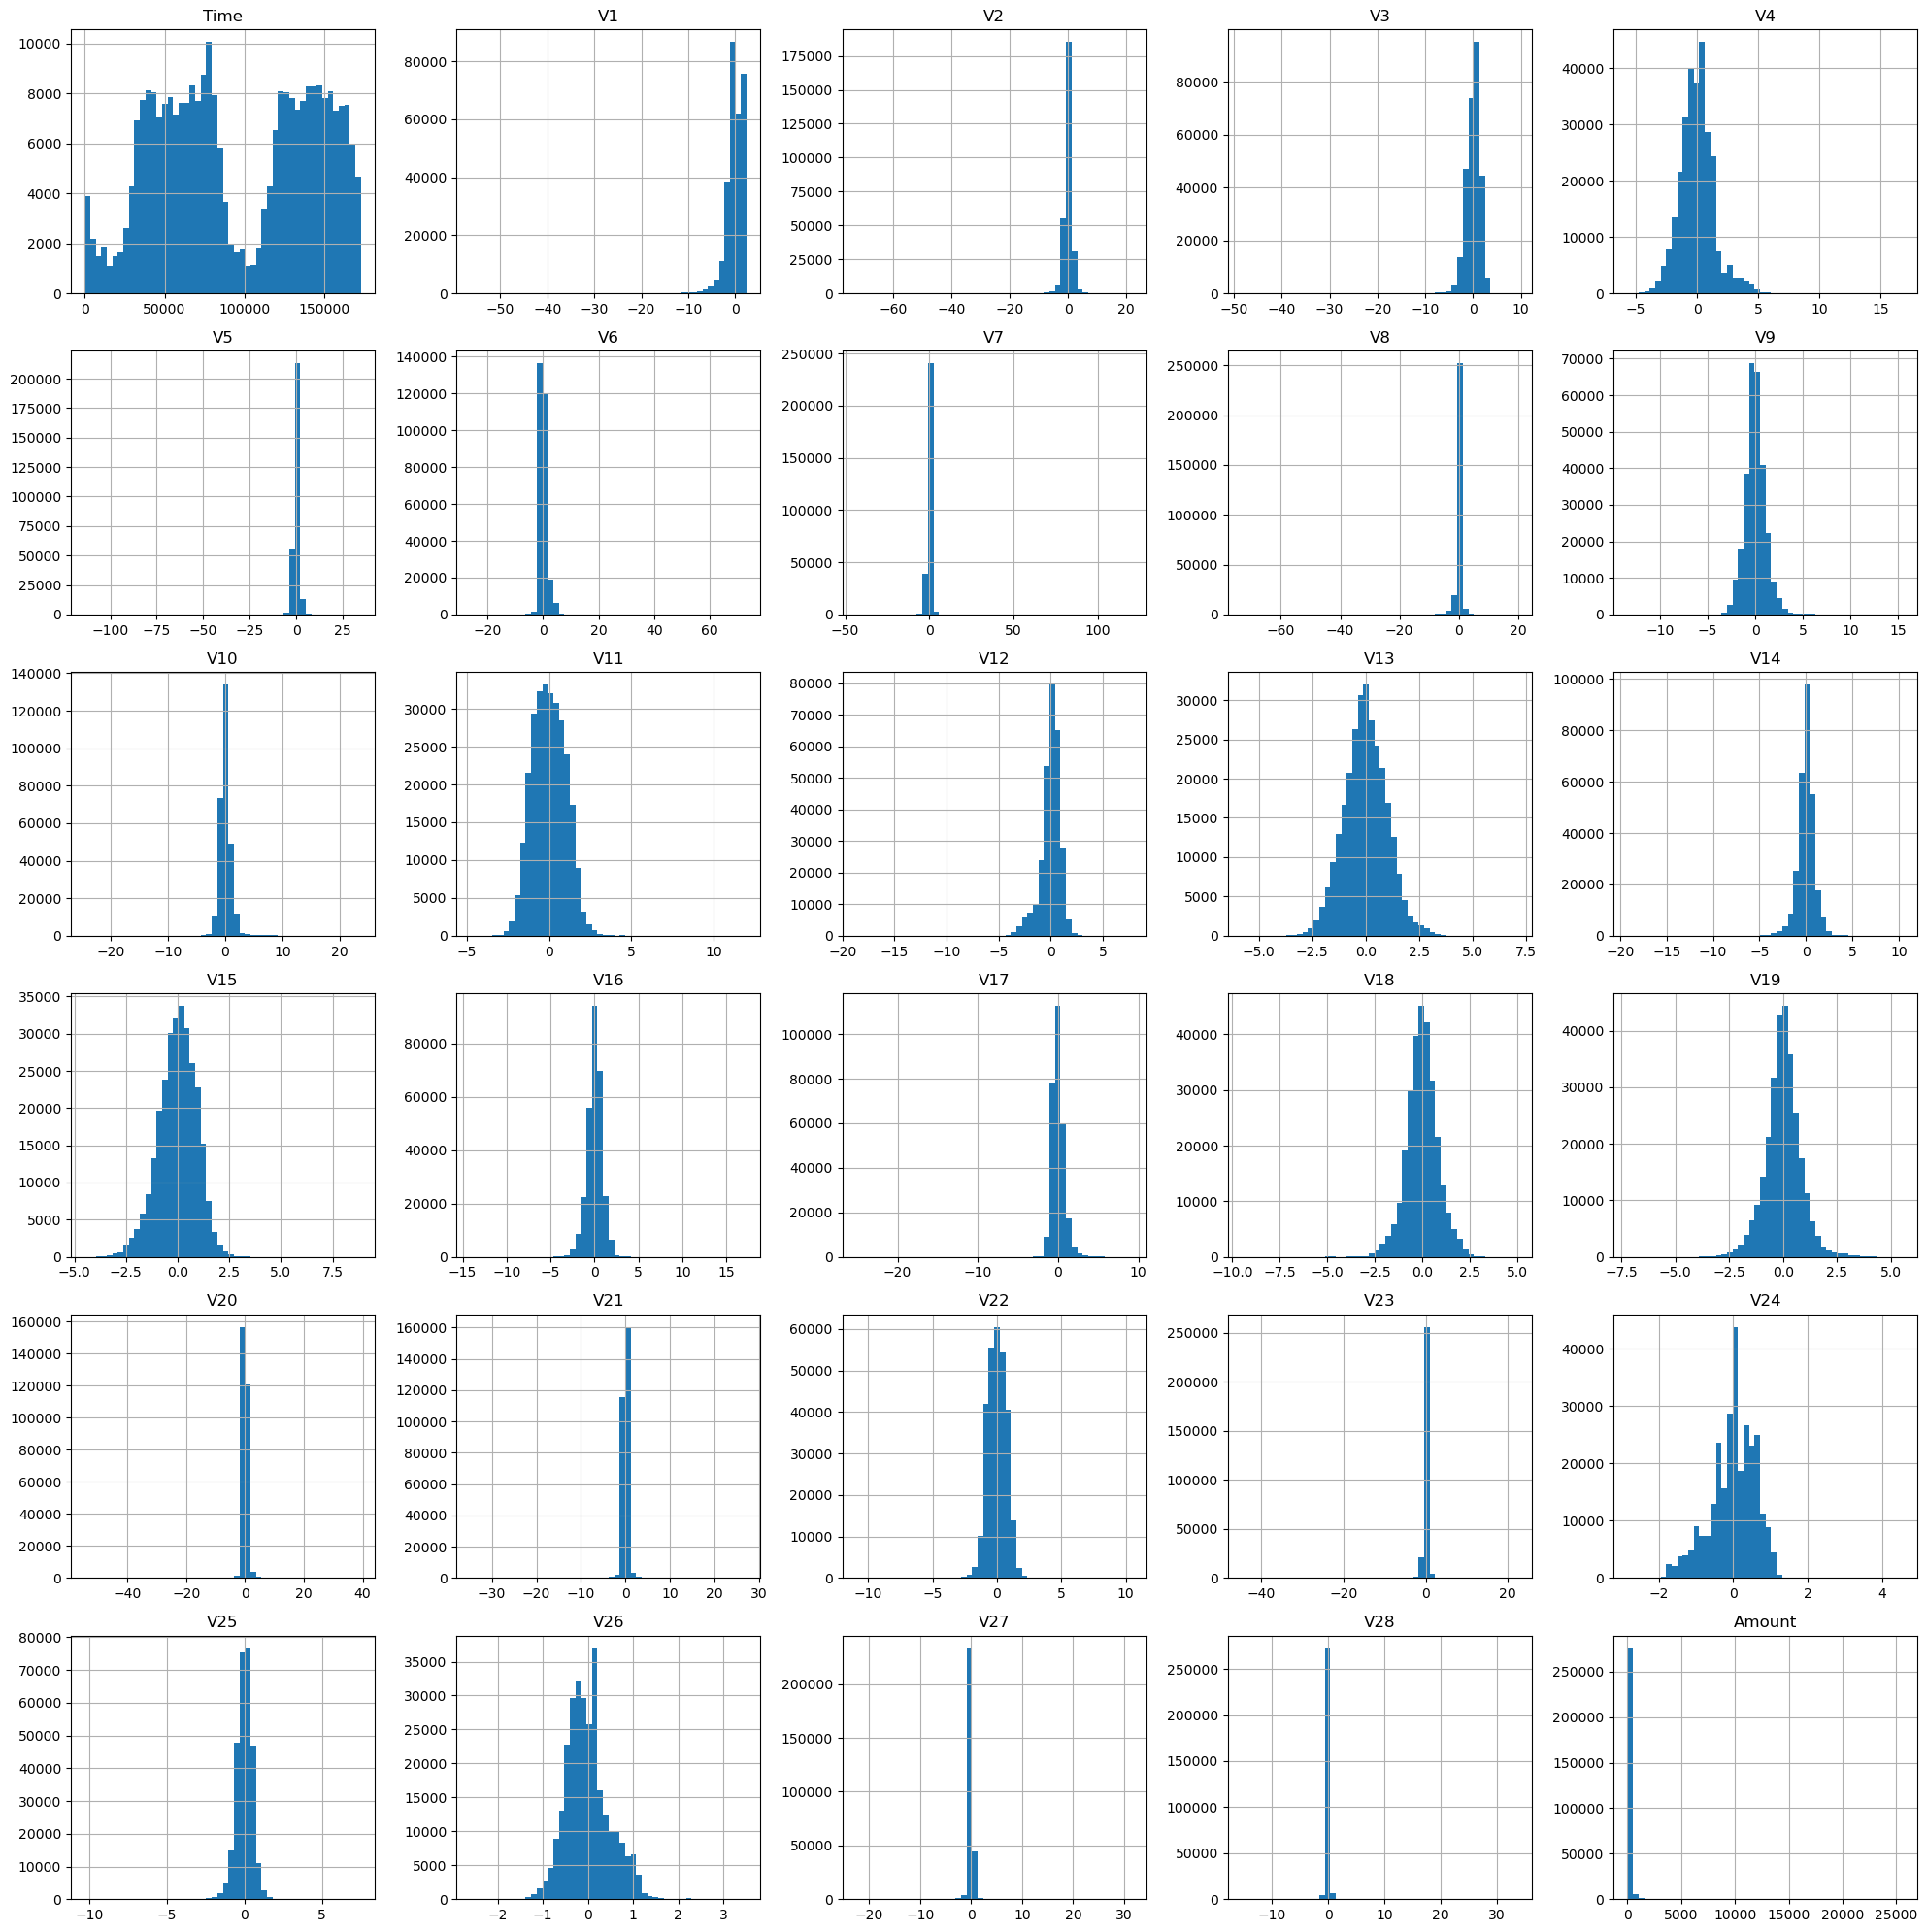

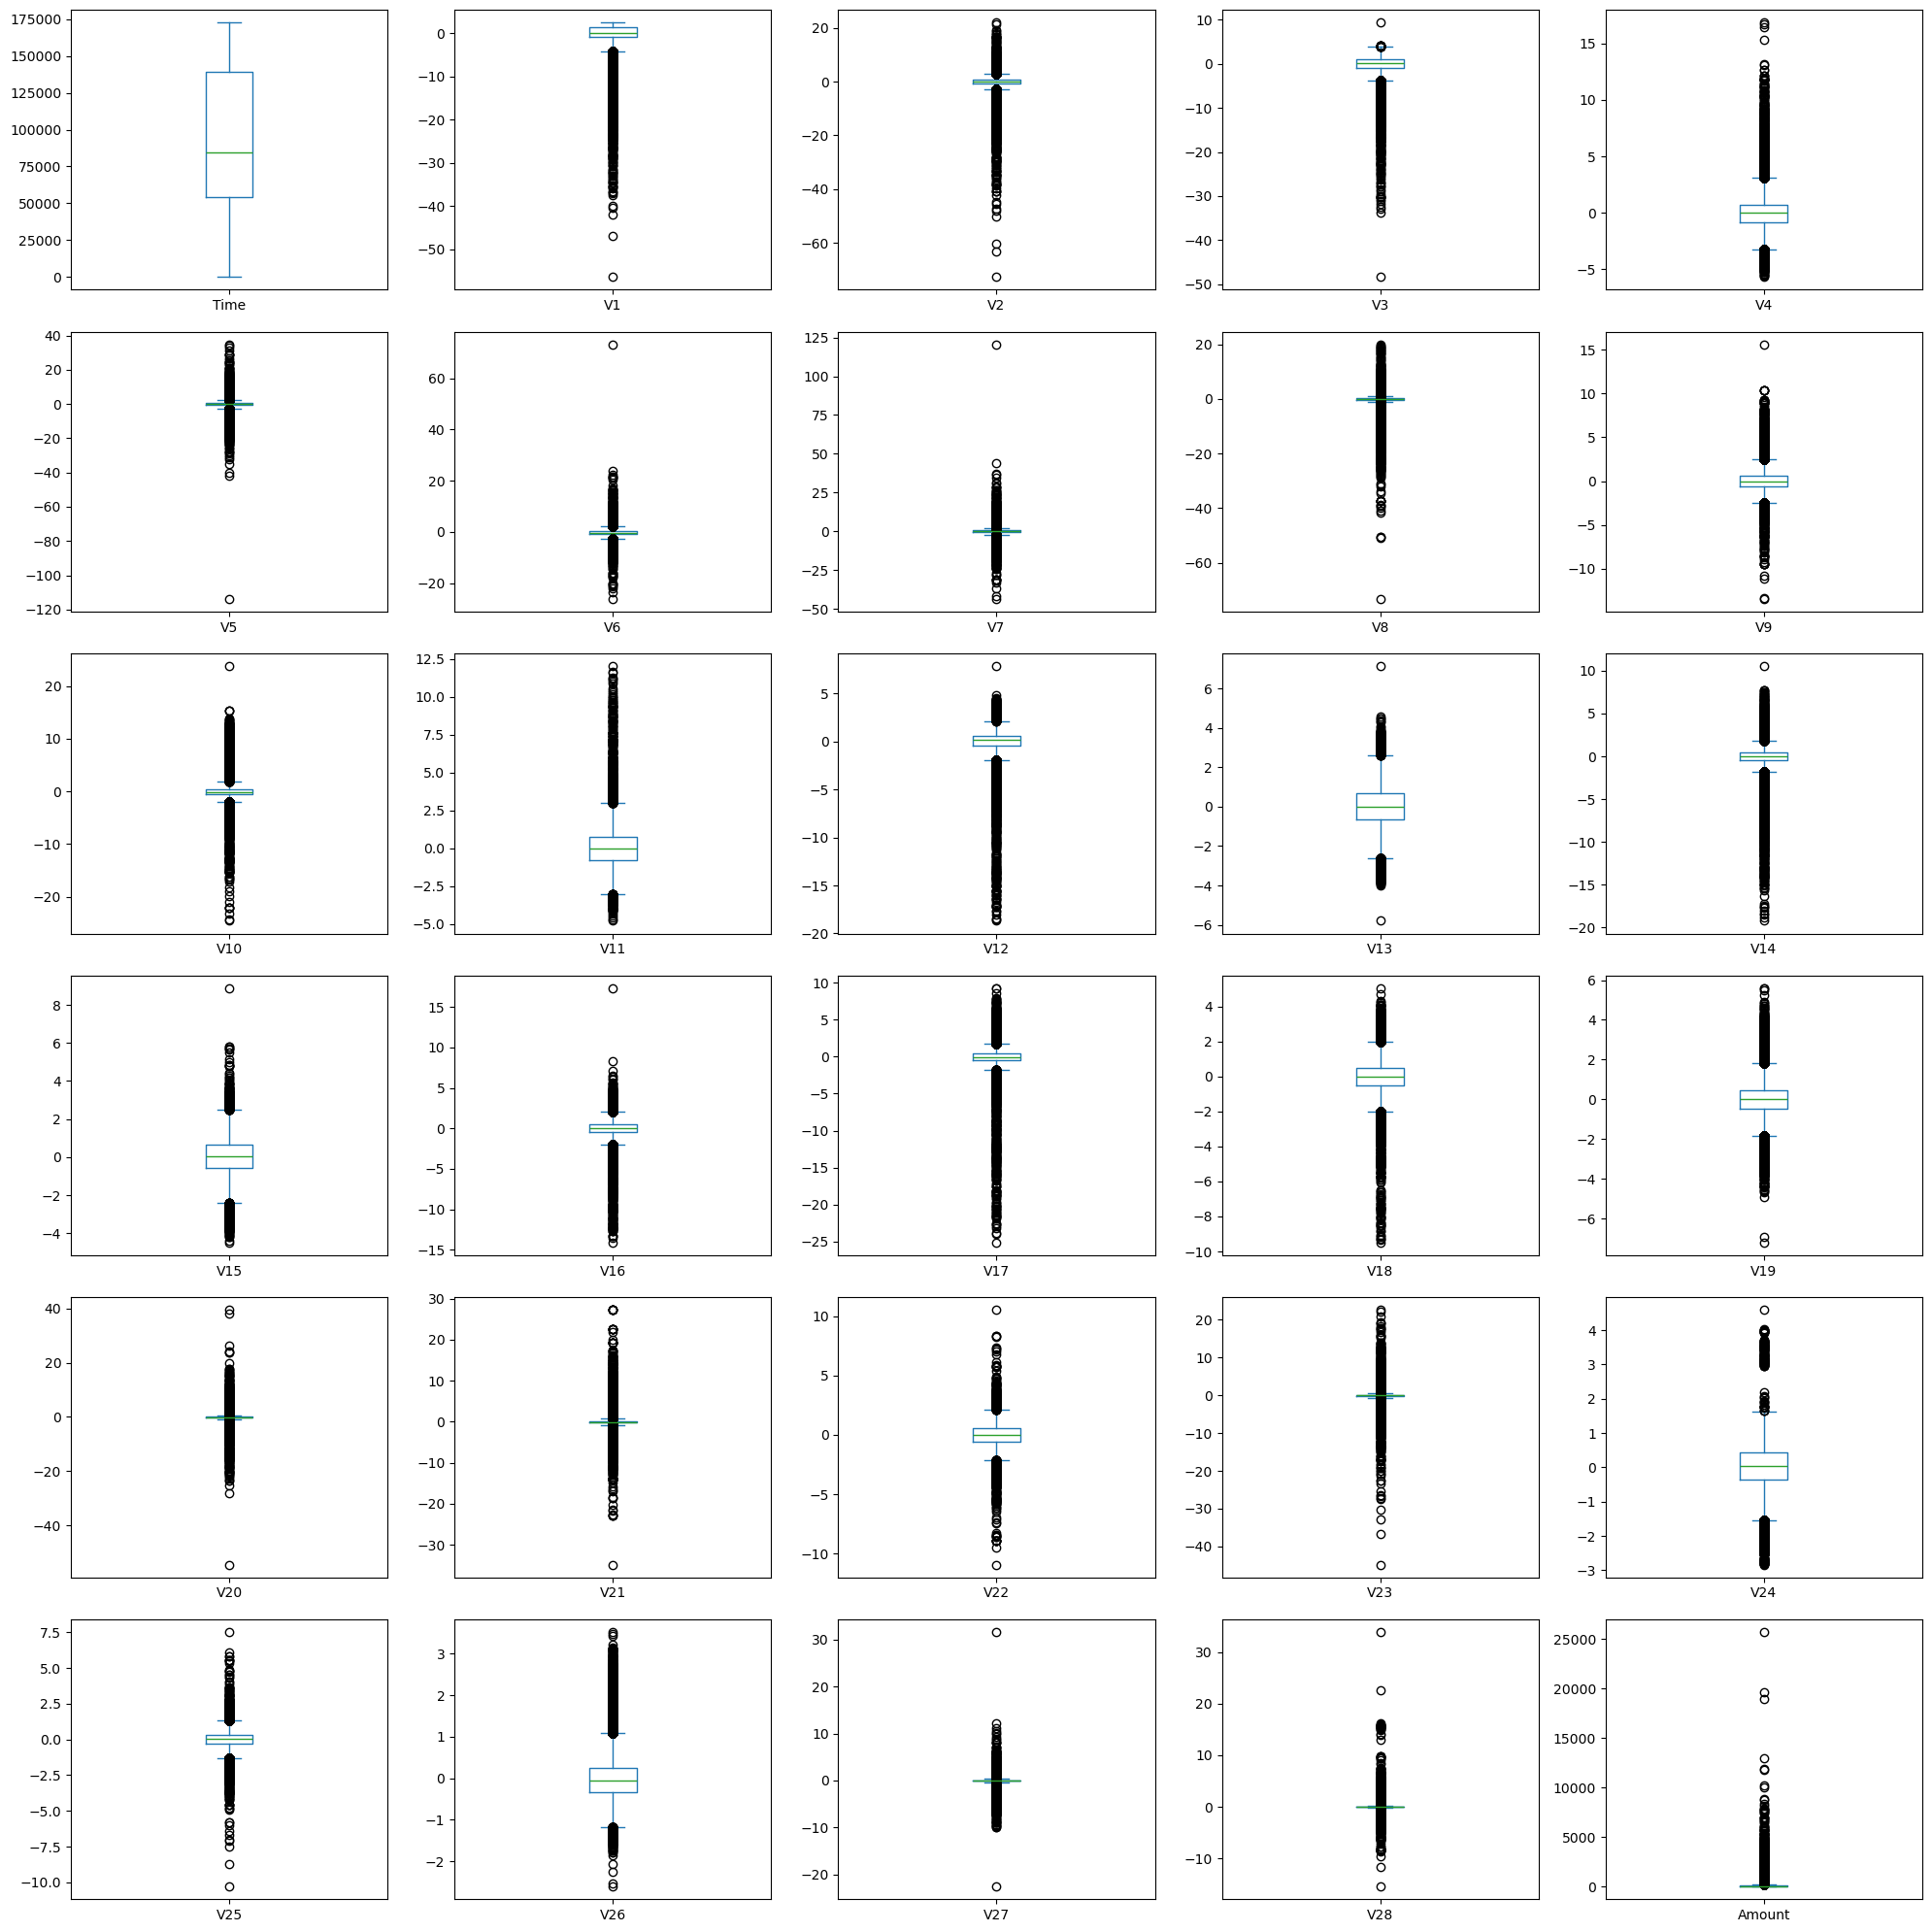

In [65]:
def graficos(df):
    df.hist(figsize=(20, 20), bins=50)
    plt.tight_layout()
    plt.show()

    # Crear boxplots para todas las columnas numéricas
    df.select_dtypes(include=['float64']).plot(kind='box', subplots=True, layout=(6, 5), figsize=(20, 20), sharex=False, sharey=False)
    plt.tight_layout()
    plt.show()
graficos(df)

In [66]:
# Filtrar los datos eliminando los valores atípicos excepto para 'Class' igual a 1

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_cleaned = df[
    (df['Class'] == 1) | 
    ~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)
]

# Mostrar el nuevo DataFrame sin valores atípicos
df_cleaned

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284796,172780.0,1.884849,-0.143540,-0.999943,1.506772,-0.035300,-0.613638,0.190241,-0.249058,0.666458,...,0.144008,0.634646,-0.042114,-0.053206,0.316403,-0.461441,0.018265,-0.041068,60.00,0
284797,172782.0,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
284800,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0


In [67]:
# # Calcular los rangos intercuartílicos (IQR)
# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# IQR = Q3 - Q1

# # Filtrar los datos eliminando los valores atípicos
# if df['Class'] is not 1:
#     df_cleaned = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# # Mostrar el nuevo DataFrame sin valores atípicos
# df_cleaned

In [68]:
print(f'Dataset Original {df.shape}')
print(f'Dataset sin Outliers {df_cleaned.shape}')

Dataset Original (284807, 31)
Dataset sin Outliers (146811, 31)


In [69]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [70]:
df_cleaned['Class'].value_counts()

Class
0    146319
1       492
Name: count, dtype: int64

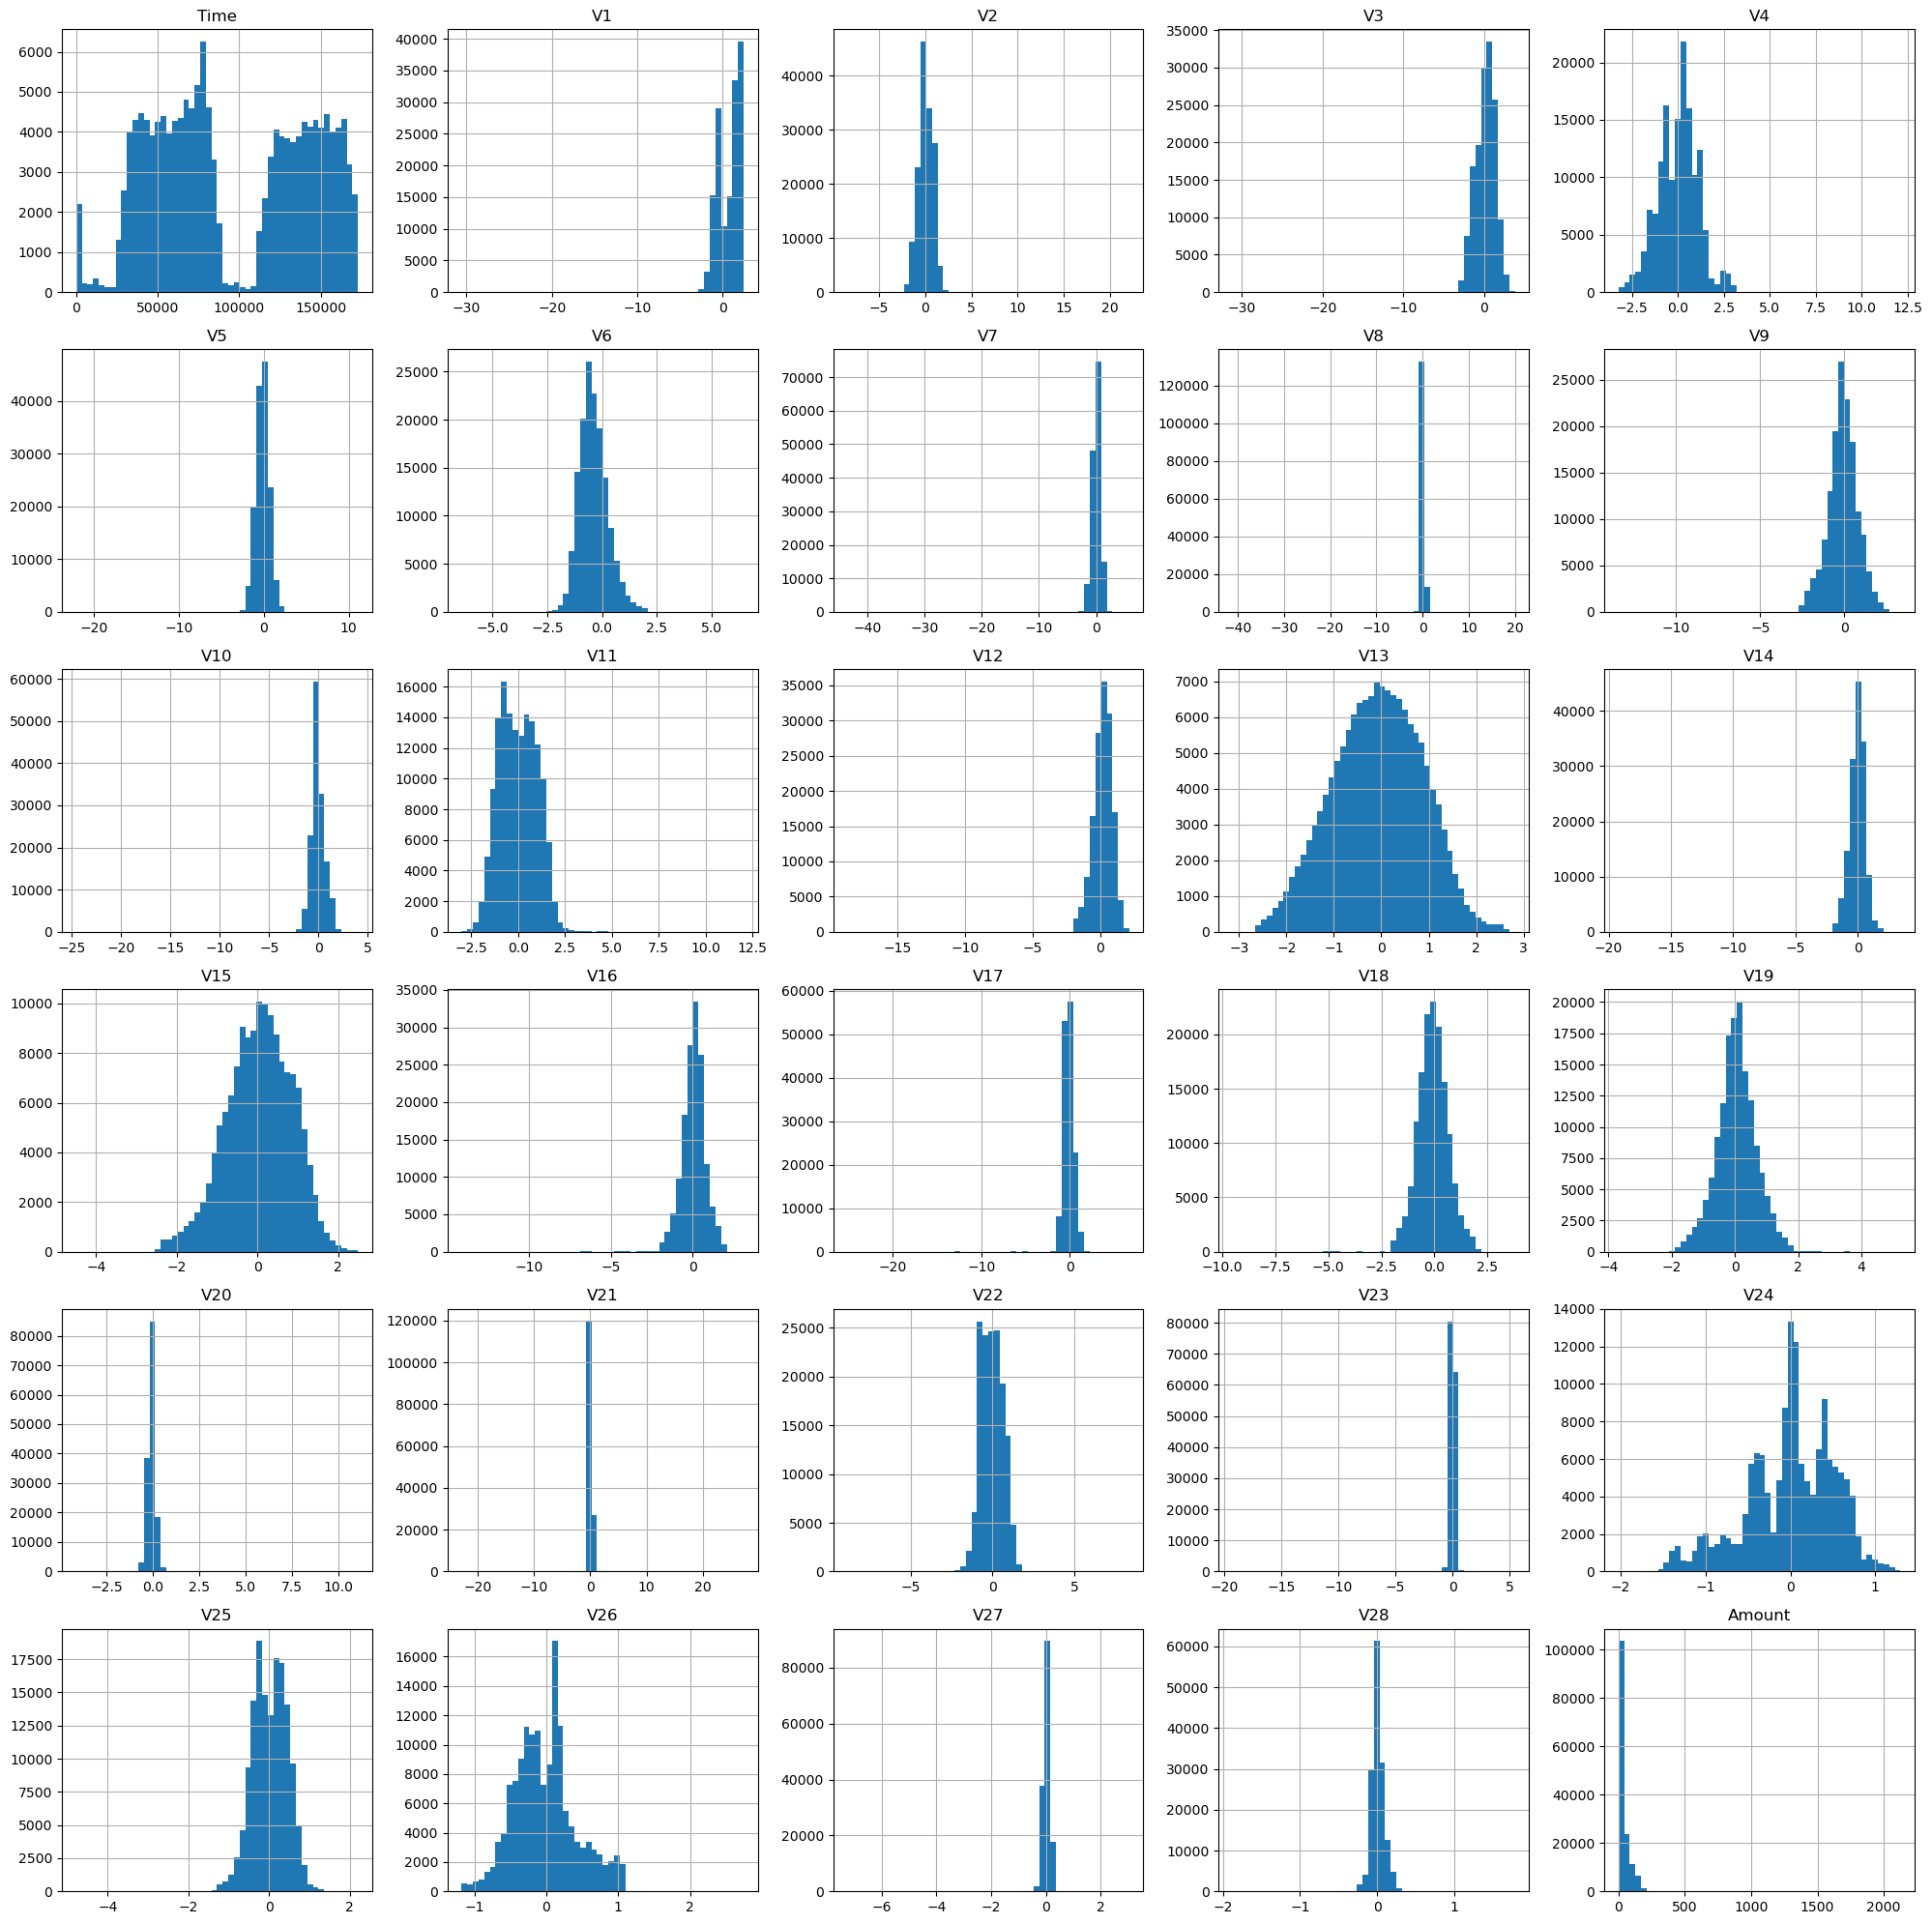

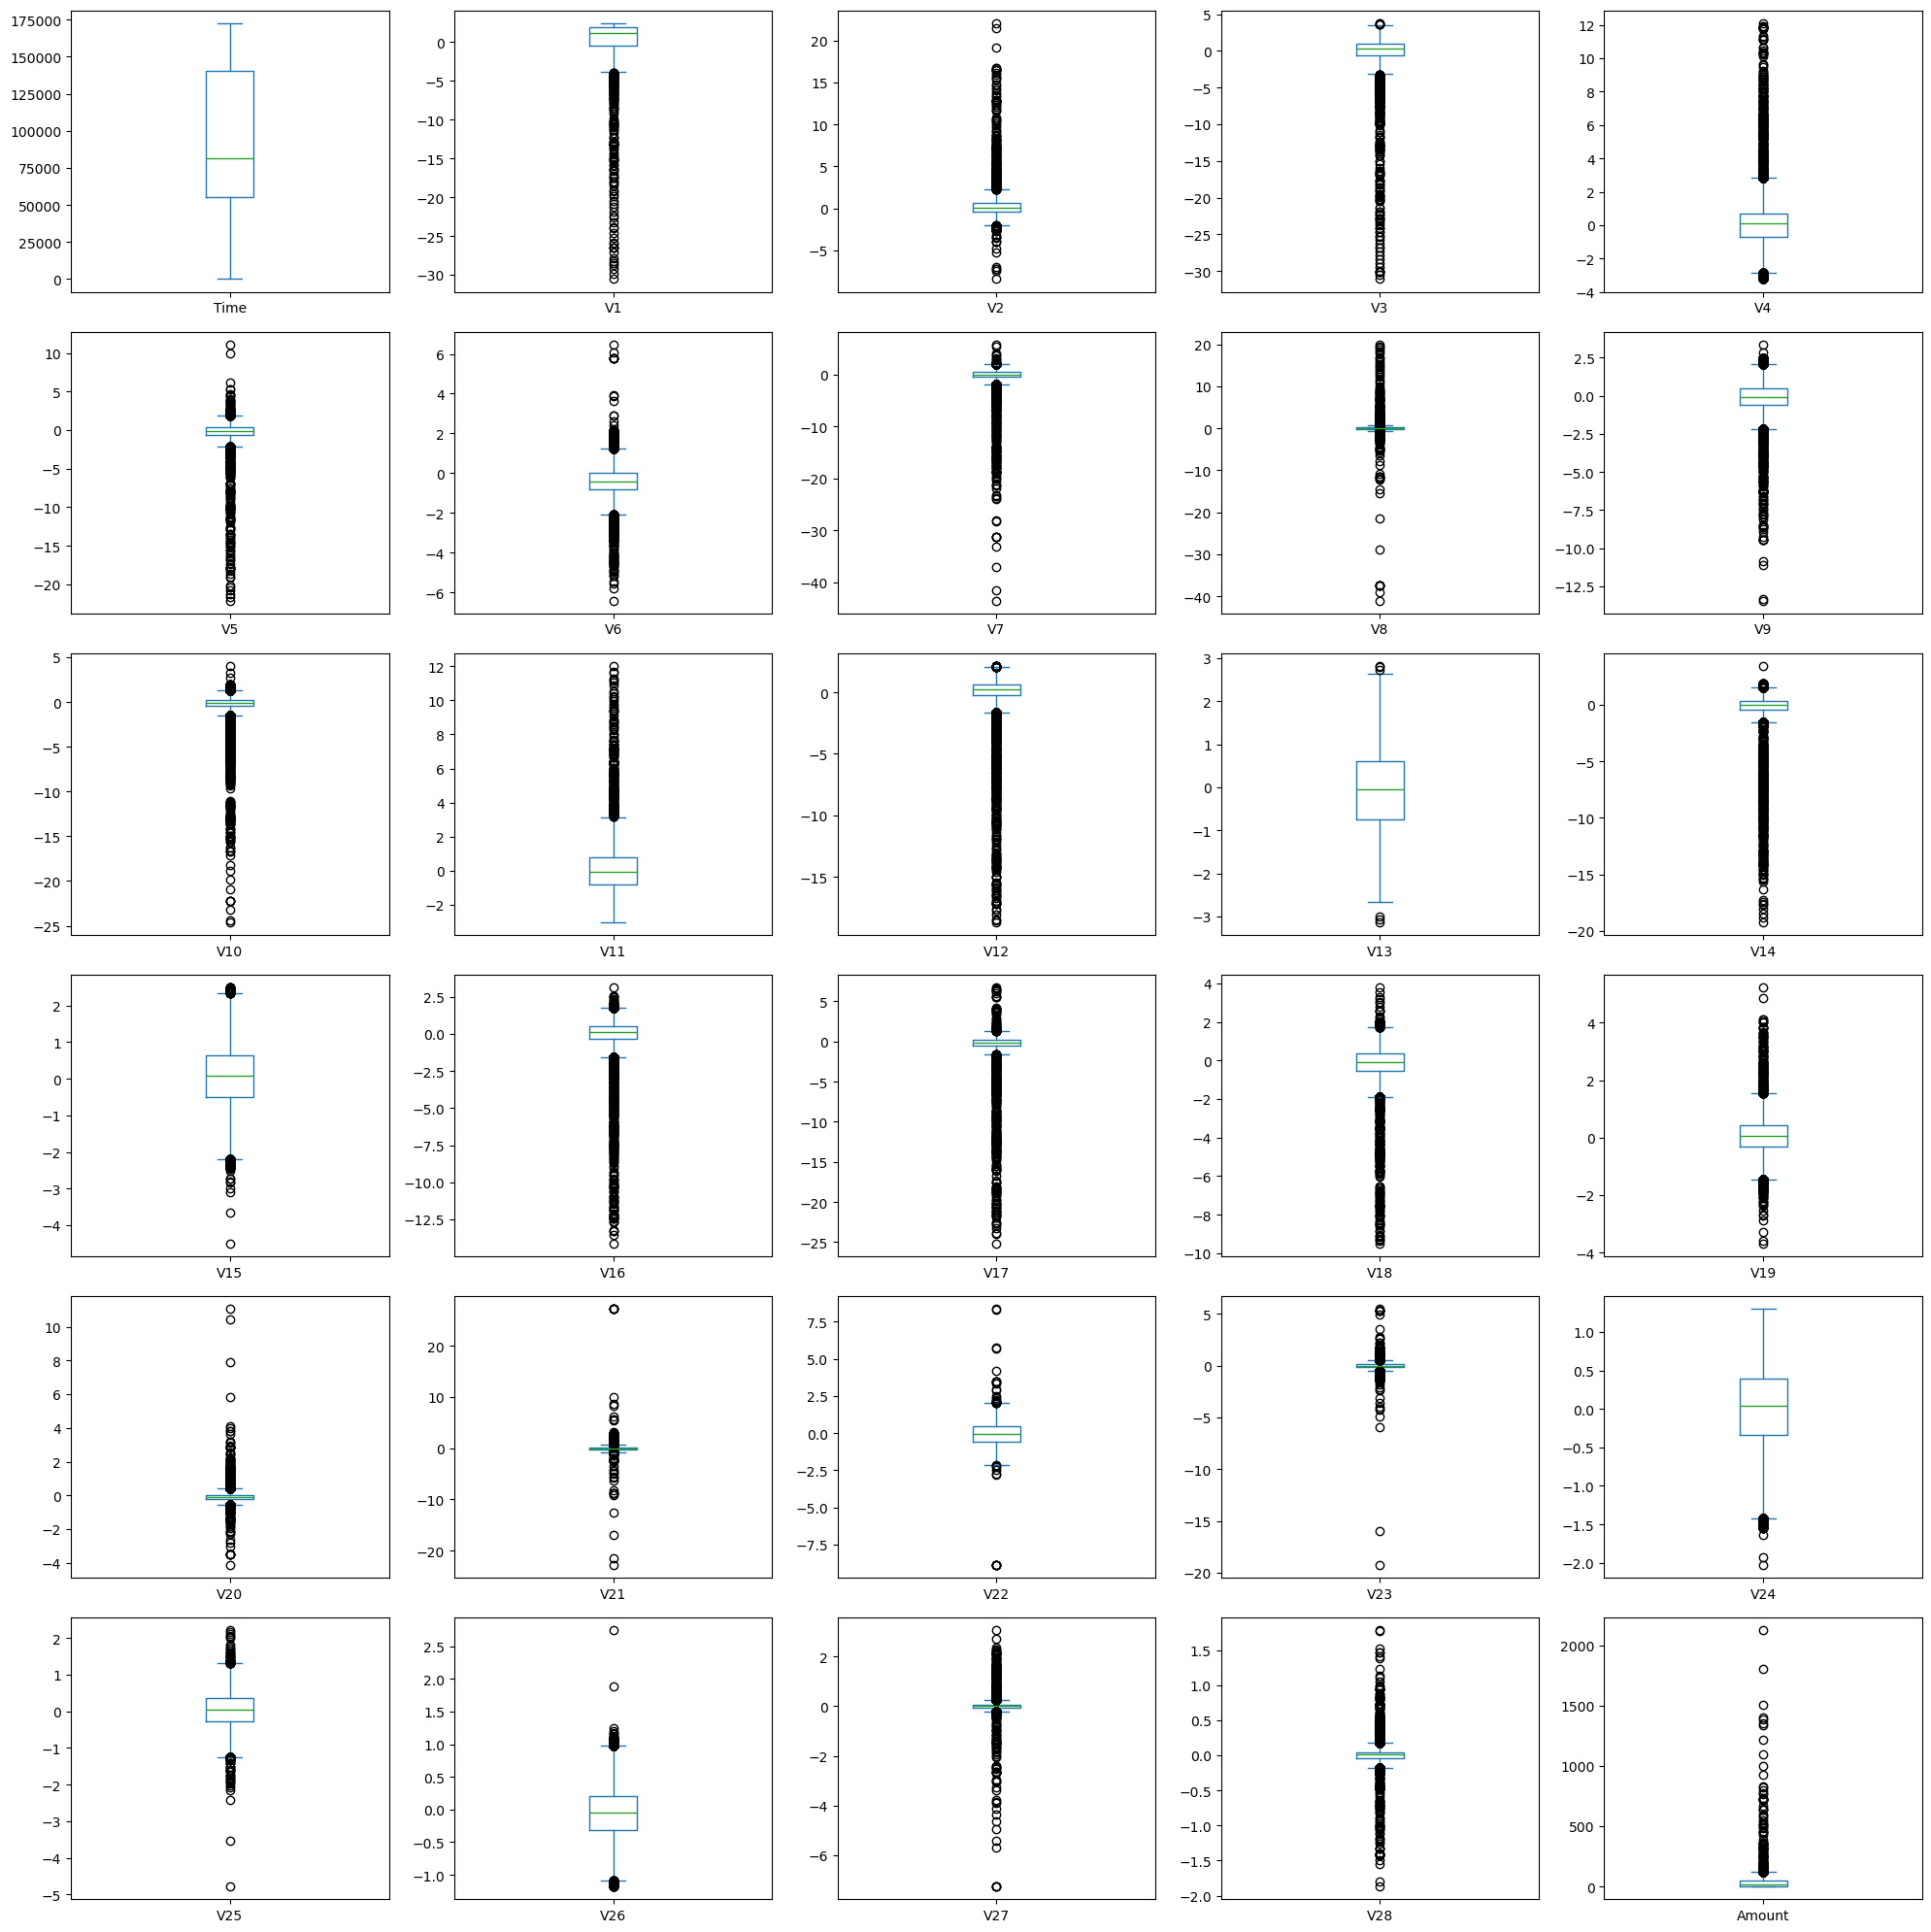

In [71]:
graficos(df_cleaned)

In [72]:
# Calcular la asimetría (skew) para las columnas numéricas
skew_values = df_cleaned.select_dtypes(include=['float64','float']).skew().sort_values(ascending= False)
print(skew_values)

V21       17.100646
Amount     4.329037
V20        3.054366
V2         1.900414
V11        0.482432
V6         0.451770
V4         0.444943
V26        0.327441
Time       0.040953
V22        0.027846
V19       -0.006479
V28       -0.050497
V13       -0.083582
V25       -0.143694
V15       -0.259982
V9        -0.426478
V24       -0.549835
V18       -0.566446
V16       -2.377156
V1        -2.565851
V5        -2.729233
V3        -3.063874
V10       -4.434151
V12       -4.665763
V14       -5.590669
V27       -6.249142
V23       -7.308582
V7        -9.097056
V17       -9.864922
V8       -21.458855
dtype: float64


In [73]:
# Filtrar las filas donde Class es igual a 1
df_class_1 = df[df['Class'] == 1]

# Calcular los outliers para cada columna
outliers_count = ((df_class_1 < (Q1 - 1.5 * IQR)) | (df_class_1 > (Q3 + 1.5 * IQR))).sum()

# Mostrar el número de outliers por columna
print(outliers_count)

Time        0
V1        174
V2        246
V3        312
V4        318
V5        208
V6        137
V7        301
V8        247
V9        223
V10       399
V11       294
V12       409
V13         8
V14       430
V15        12
V16       351
V17       397
V18       237
V19       135
V20       194
V21       244
V22        28
V23       149
V24         3
V25        55
V26        10
V27       344
V28       272
Amount     91
Class     492
dtype: int64


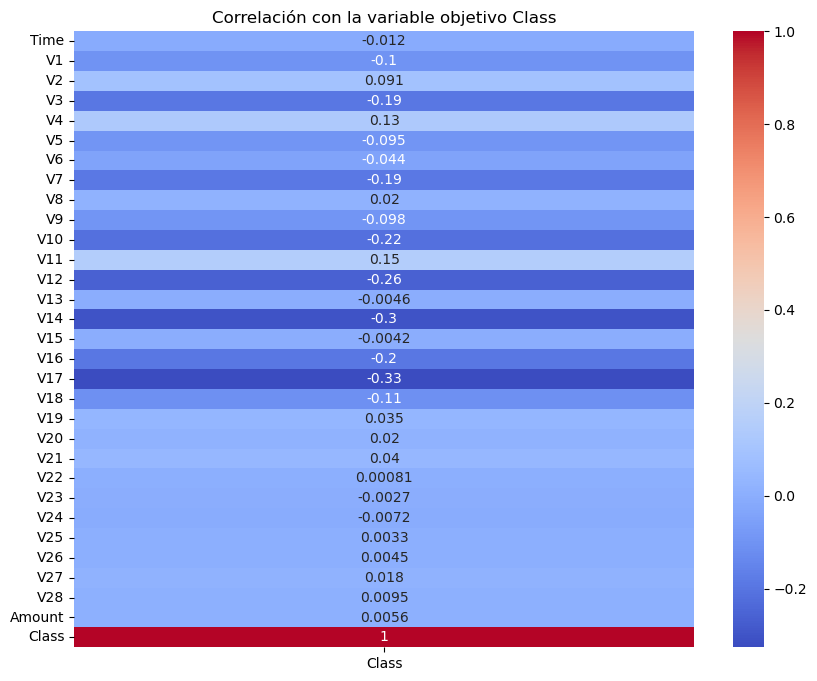

In [74]:
# Crear una matriz de correlación para las columnas numéricas
correlation_matrix = df.corr()

# Filtrar las correlaciones relacionadas con la variable objetivo 'Class'
correlation_with_class = correlation_matrix[['Class']]

# Crear un mapa de calor con seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_with_class, annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlación con la variable objetivo Class')
plt.show()

In [75]:
spearman_correlation = df.corr(method='spearman')
spearman_correlation_with_class = spearman_correlation[['Class']]
spearman_correlation_with_class.style.background_gradient(cmap='coolwarm')
spearman_correlation_with_class_sorted = spearman_correlation_with_class.sort_values(by='Class', ascending=False)
spearman_correlation_with_class_sorted.style.background_gradient(cmap='coolwarm')

,Class
Class,1.000000
V4,0.063045
V11,0.060143
V2,0.051062
V21,0.035442
V27,0.028311
V8,0.022706
V19,0.022546
V20,0.021574
V28,0.020417


In [76]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Escalar los datos para que tengan media 0 y desviación estándar 1
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned.drop(columns=['Class','Time','Amount']))

# Aplicar PCA para reducir a 5 componentes
pca = PCA(n_components=5)
pca_result = pca.fit_transform(scaled_data)

# Crear un DataFrame con los resultados de la PCA
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(5)])
pca_df[['Class','Time','Amount']] = df_cleaned[['Class','Time','Amount']].reset_index(drop=True)

# Mostrar la varianza explicada por cada componente
print(f'Varianza explicada por cada componente: {pca.explained_variance_ratio_}')
print(f'Varianza explicada acumulada: {pca.explained_variance_ratio_.cumsum()}')

pca_df.shape

Varianza explicada por cada componente: [0.11510863 0.09359642 0.07706047 0.06844853 0.06125043]
Varianza explicada acumulada: [0.11510863 0.20870505 0.28576552 0.35421406 0.41546449]


(146811, 8)

In [82]:
df_cleaned.var

<bound method DataFrame.var of             Time        V1        V2        V3        V4        V5        V6  \
0            0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1            0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
3            1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4            2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
5            2.0 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728   
...          ...       ...       ...       ...       ...       ...       ...   
284796  172780.0  1.884849 -0.143540 -0.999943  1.506772 -0.035300 -0.613638   
284797  172782.0 -0.241923  0.712247  0.399806 -0.463406  0.244531 -1.343668   
284800  172784.0  2.039560 -0.175233 -1.196825  0.234580 -0.008713 -0.726571   
284801  172785.0  0.120316  0.931005 -0.546012 -0.745097  1.130314 -0.235973   
284803  172787.0 -0.732789 -0.055080  2.035030 -0.738589  0.868229  1.058415   

        

In [78]:
pca_df.var

<bound method DataFrame.var of              PC1       PC2       PC3       PC4       PC5 Class      Time  \
0      -1.680825  0.032031  1.627892 -0.333372  0.314274     0       0.0   
1       0.174576  0.278706 -0.374241 -0.508275  1.011385     0       0.0   
2      -1.016071  0.550616  2.884640 -0.772075  1.230017     0       1.0   
3      -2.782759  0.742977  1.311115 -0.599176 -0.331892     0       2.0   
4      -2.146162  1.071593  0.347075 -1.677673  0.286865     0       2.0   
...          ...       ...       ...       ...       ...   ...       ...   
146806  0.927588  0.026255 -0.283022  1.832558  0.716888     0  172780.0   
146807 -0.821258  0.813066 -2.244335 -1.691072 -1.181223     0  172782.0   
146808  2.095554 -0.111837 -1.866750 -0.215053  1.256429     0  172784.0   
146809 -1.615458  1.257498 -1.056619 -1.571551  0.295643     0  172785.0   
146810 -1.460749  0.445887  1.502742 -0.514228  1.227173     0  172787.0   

        Amount  
0       149.62  
1         2.69  
2    

In [79]:
pca_df.corr().style.background_gradient(cmap='coolwarm')

,PC1,PC2,PC3,PC4,PC5,Class,Time,Amount
PC1,1.000000,-0.000000,-0.000000,0.000000,0.000000,-0.373729,0.210635,0.061013
PC2,-0.000000,1.000000,-0.000000,-0.000000,0.000000,-0.625857,0.029301,-0.162399
PC3,-0.000000,-0.000000,1.000000,-0.000000,0.000000,-0.150475,-0.265330,0.203872
PC4,0.000000,-0.000000,-0.000000,1.000000,-0.000000,0.100208,0.123577,0.030970
PC5,0.000000,0.000000,0.000000,-0.000000,1.000000,0.010752,0.009640,-0.028988
Class,-0.373729,-0.625857,-0.150475,0.100208,0.010752,1.000000,-0.018319,0.113146
Time,0.210635,0.029301,-0.265330,0.123577,0.009640,-0.018319,1.000000,-0.028198
Amount,0.061013,-0.162399,0.203872,0.030970,-0.028988,0.113146,-0.028198,1.000000


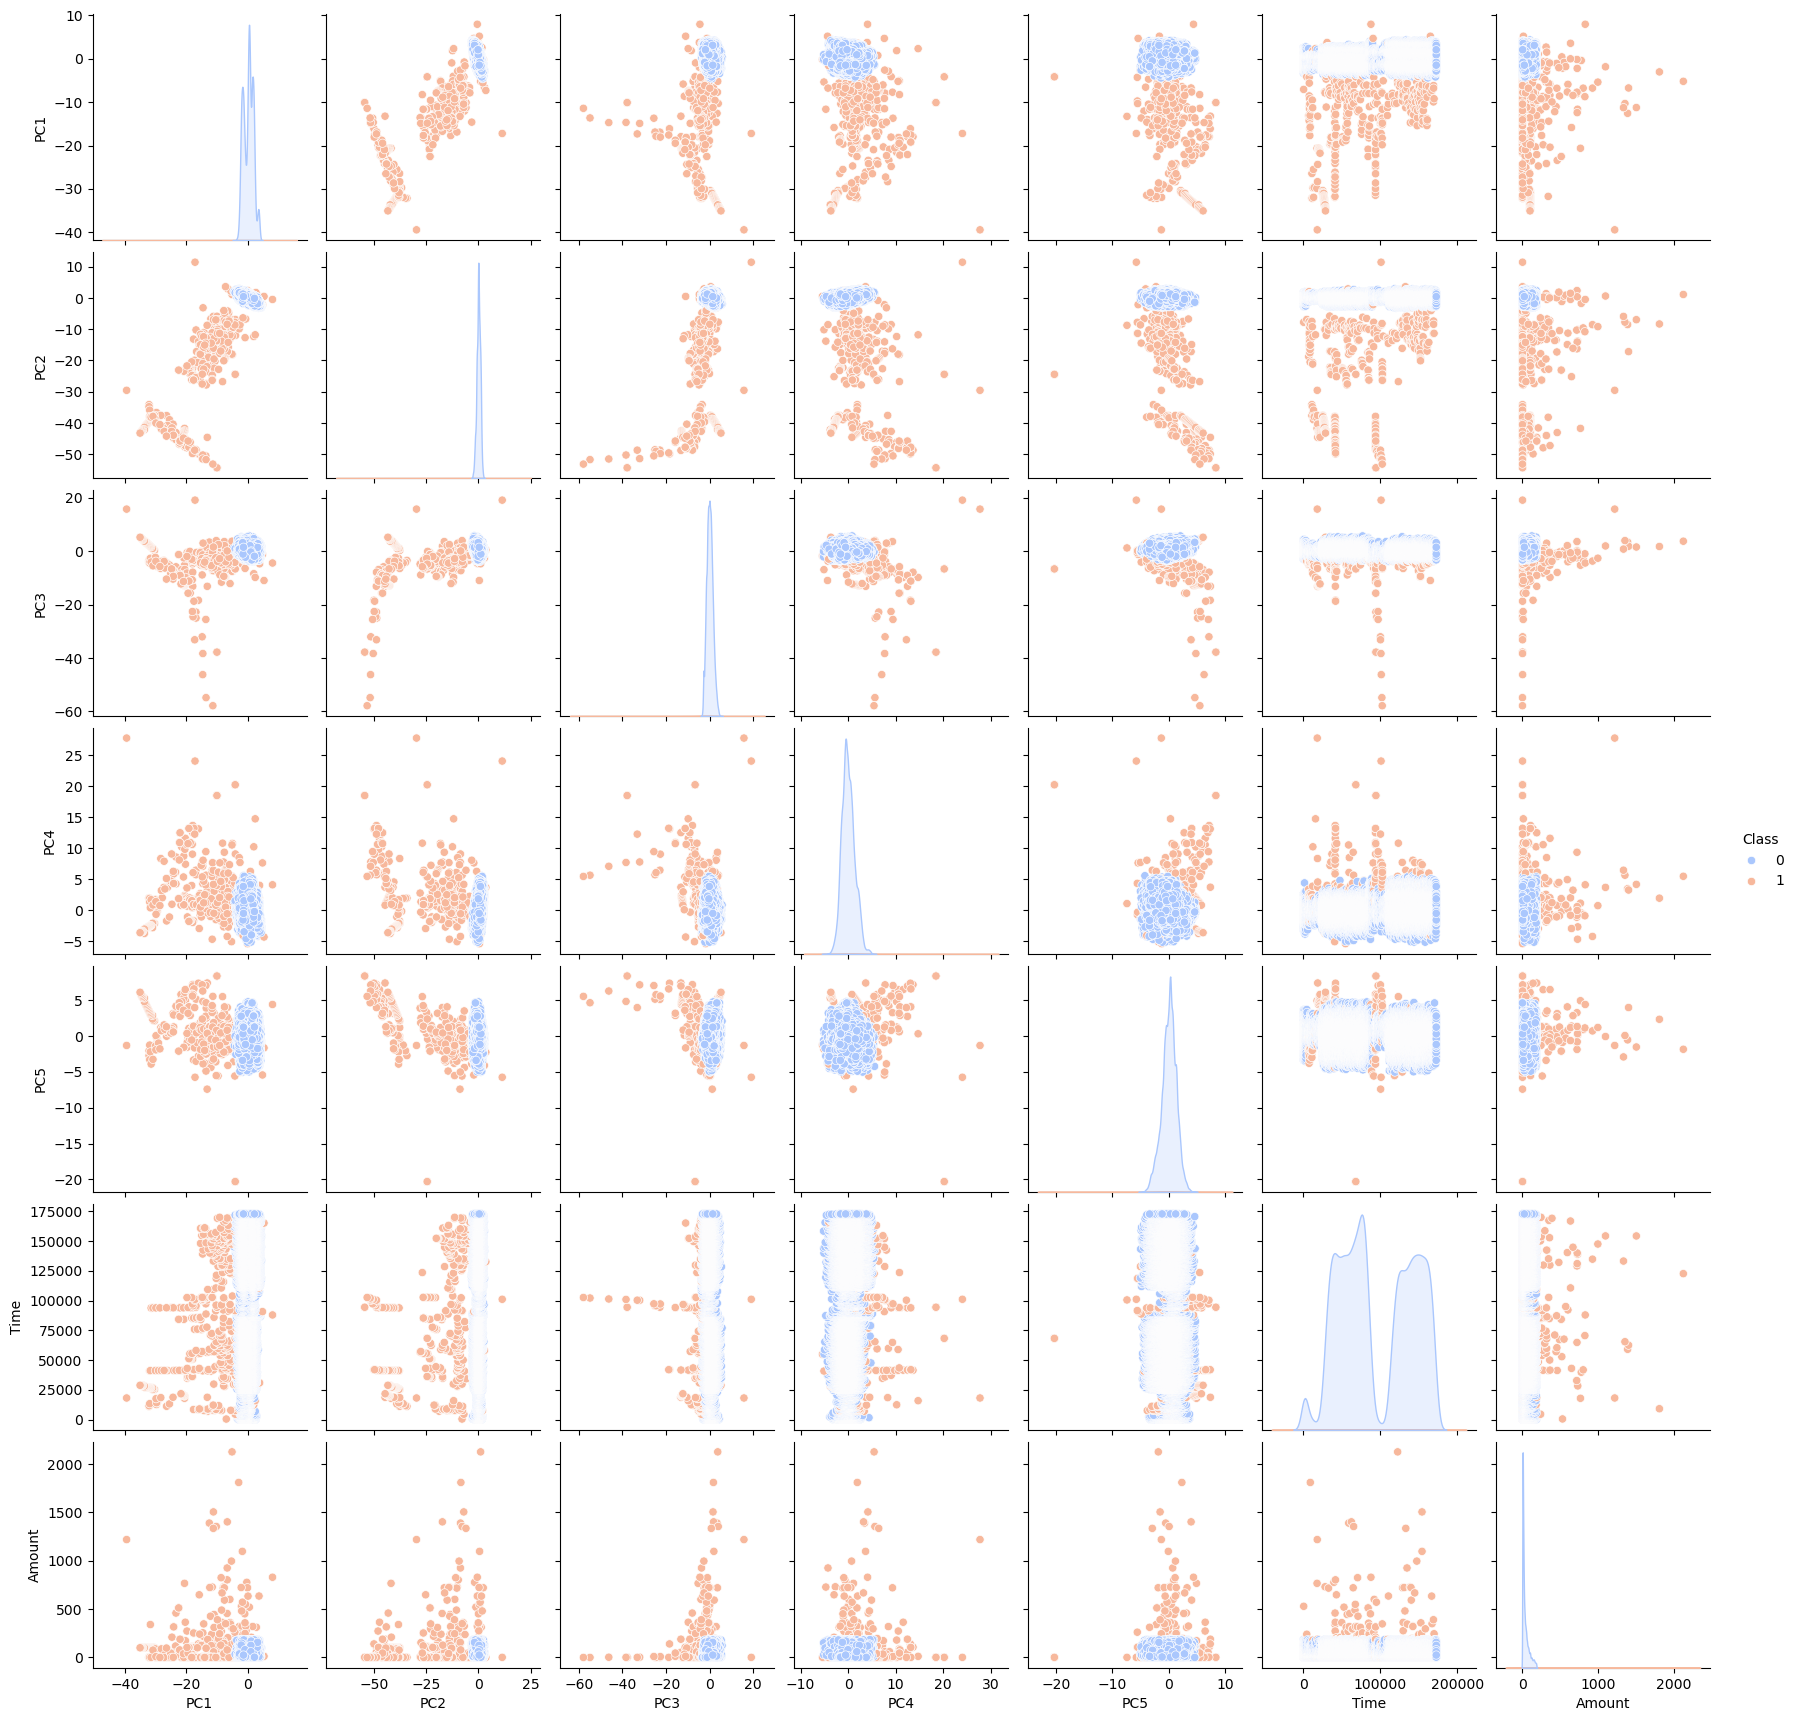

In [80]:
sns.pairplot(pca_df, hue='Class', diag_kind='kde', palette='coolwarm')
plt.show()